#  Utah Poverty Analysis using SAIPE data

#### Outline of the Analysis
<br> - IRS data 
<br>  -  Ranking all states by Mean and median AGI
<br>  -  Mean income and Mean income change over time for all states from IRS data
<br>  -  Change of Mean AGI,Tax exemptions of Utah and compare with highest and lowest AGI states
<br>  -  Ratio of poorto total exemption for Utah and compare with highest and lowest AGI states
<br> - ALLPOVU data 
<br>  -  Year over year poverty for Utah and compare with differet age groups
<br>  -  Change of povert year over year
<br> - Utah County snapshot for July 2017
<br> - SNAP Analysis
<br>  -  Compare Utah with with highest and lowest AGI states 
<br>  -  Year over year change for foodstamp to population
<br> - Clustering to find similarities between states
<br> - Simple regression to find number of foodstamp users 
<br> - Conclusion

###### Importing required modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from time import time
import datetime
import gc
import json
import plotly.figure_factory as ff
pd.set_option('display.max_columns', 1000)
import warnings
warnings.filterwarnings("ignore")

###### Loading data files 

In [2]:
file_path="/Users/krishanubanerjee/Downloads/snap_finance_project/"
irs=pd.read_excel(file_path+"/irs.xls",skiprows=2)
allpovu=pd.read_excel(file_path+"/allpovu.xls",skiprows=3)
cntysnap=pd.read_excel(file_path+"/cntysnap.xls",skiprows=2)
statesnap=pd.read_excel(file_path+"/statesnap.xls",skiprows=2)
#county_population=pd.read_csv(file_path+"county_population.csv")

#### External data - population from census

In [3]:
county_population=pd.read_csv(file_path+"county_population.csv",encoding = "ISO-8859-1")
pop_est_2018=pd.read_excel(file_path+"/pop_est_2018.xlsx",skiprows=3)

##### IRS data Analysis

In [41]:
#irs.head()

In [17]:
irs.columns

Index(['State FIPS code', 'Name', 'Year', 'Total exemptions',
       'Poor exemptions', 'Age 65 and over exemptions',
       'Age 65 and over poor exemptions', 'Child exemptions',
       'Poor child exemptions', 'Total exemptions under age 65',
       'Poor exemptions under age 65', 'Median AGI', 'Mean AGI'],
      dtype='object')

#### Ranking States average Mean AGI and Median AGI

In [ ]:
# Unique states and years
irs_year=sorted(list(set(irs['Year'])))
irs_state=list(set(irs['Name']))

# Mean of mean AGI data
df=irs.groupby('Name').agg({'Mean AGI':'mean','Median AGI':'mean'}).sort_values('Mean AGI',ascending=True)\
                        .reset_index()

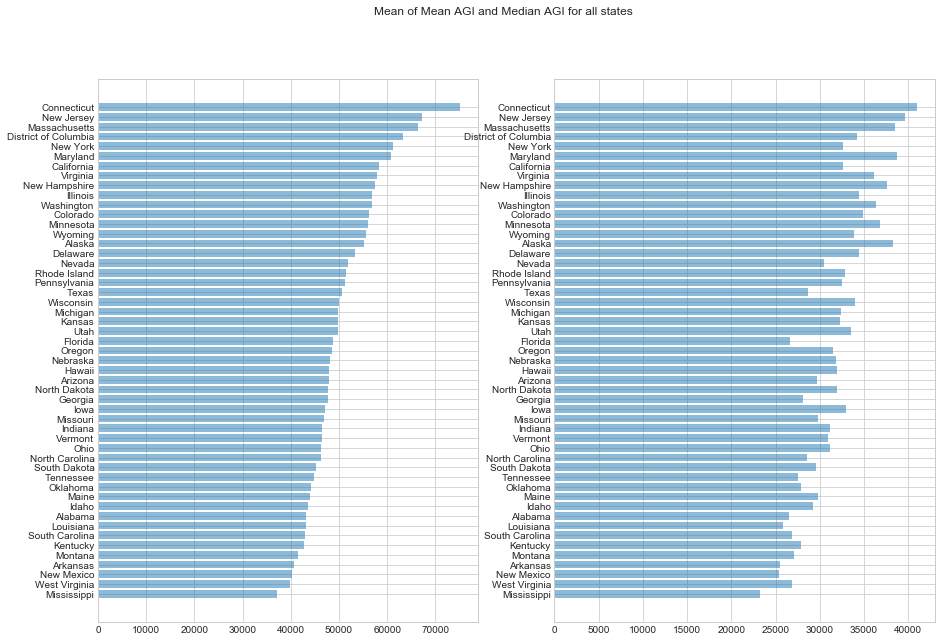

In [181]:
# Plot  
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
fig.suptitle('Mean of Mean AGI and Median AGI for all states')
ax1.barh(df['Name'], df['Mean AGI'], align='center', alpha=0.5)
ax2.barh(df['Name'], df['Median AGI'],align='center', alpha=0.5)
plt.show()

<br> 1) We can see Connecticut is highest mean for Mean AGI and Median AGI where Mississipi is the lowest
<br> 2) Utah is in middle
<br> 3) There are some states like Maryland or alaska where Median ranking is higher than Mean suggesting
        left skewed distribution

###### Year over year for all state and measures of IRS data

<br> Year over year change percentage=100* ((Values of measure in year [i])- (Values of measure in year [i-1])  /  (Values of measure in year [i])

In [ ]:
def get_year_over_year_change(measure,state,plot=True):
    """ 
    This function will calculate year over year change percentage for a measure for a state of irs data
    input : any measure from irs data, state and if plot is required
    output: list of change percentage and line plot 
    """
    irs_year=sorted(list(set(irs['Year'])))
    change_over_year_list=[]
    for i in range(1,len(irs_year)):
        change_over_year=irs[measure][irs['Year']==irs_year[i]][irs['Name']==state].values[0]- \
                       irs[measure][irs['Year']==irs_year[i-1]][irs['Name']==state].values[0]
        change_over_year_prcnrg=100*round((change_over_year/irs[measure][irs['Year']==irs_year[i-1]]\
                                   [irs['Name']==state].values[0]),4)
        change_over_year_list.append(change_over_year_prcnrg)
    
    
    if plot==True:
        fig = plt.figure(figsize=(10,8))
        ax = plt.axes()
        ax.plot(irs_year[1:len(irs_year)],change_over_year_list)
    return(change_over_year_list)


#### Comparison of Change Rate Year over Year for Mean AGI, Poor Exemptions and Total Exemptions
#####       Utah against Highest and Lowest Mean AGI States

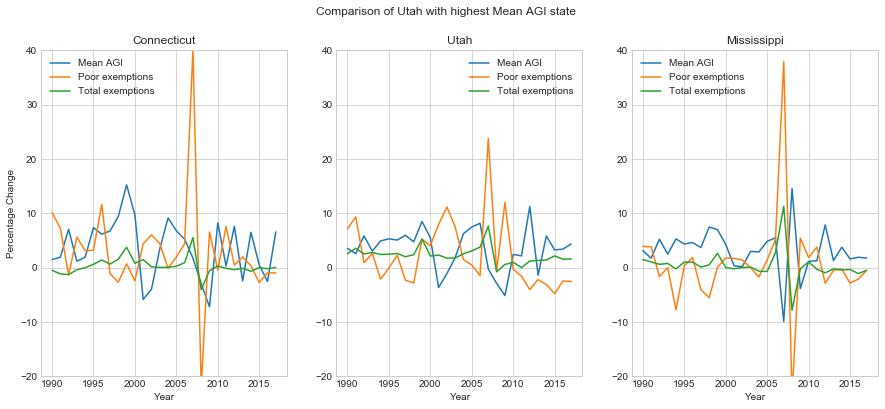

In [206]:
# Plot  
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,6))
fig.suptitle('Comparison of Utah with highest Mean AGI state')
ax1.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Mean AGI','Connecticut',plot=False),\
                                     label='Mean AGI')
ax1.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Poor exemptions','Connecticut',plot=False),\
                                     label='Poor exemptions')
ax1.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Total exemptions','Connecticut',plot=False),\
                                   label='Total exemptions')
ax1.set_ylim(-20, 40)
ax1.title.set_text('Connecticut')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage Change')
ax1.legend()

ax2.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Mean AGI','Utah',plot=False),label='Mean AGI')
ax2.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Poor exemptions','Utah',plot=False),\
                                     label='Poor exemptions')
ax2.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Total exemptions','Utah',plot=False),\
                                   label='Total exemptions')
ax2.set_ylim(-20, 40)
ax2.title.set_text('Utah')
ax2.set_xlabel('Year')
ax2.legend()

ax3.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Mean AGI','Mississippi',plot=False),label='Mean AGI')
ax3.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Poor exemptions','Mississippi',plot=False),\
                                     label='Poor exemptions')
ax3.plot(irs_year[1:len(irs_year)],get_year_over_year_change('Total exemptions','Mississippi',plot=False),\
                                   label='Total exemptions')
ax3.set_ylim(-20, 40)
ax3.title.set_text('Mississippi')
ax3.set_xlabel('Year')
plt.legend()
plt.show()


<br> 1) Around 2008 we can see spike in 'Poor Exemptions' for all states , probably impact of federal economy
<br> 2) 'Mean AGI' change is generally within +10% to -5% with some exeptions and state specific
<br> 3) 'Total Exemption' is very consistent
<br> 4) Is there any inverse relation between 'Poor Execmption' and 'Mean AGI' ? Is it a economic rule ? Need to analyse more to make general conclusion

#### Poor to total exemption ratio

In [218]:
def get_poor_to_total_ratio_data(state):
    """
    This function will get the ratio for poor exemtion to total exemption for any category
    input - state
    output - dataframe with three derived ratios
    """
    df_irs=irs[irs['Name']==state]
    df_irs['over_65_ratio']=df_irs['Age 65 and over poor exemptions']/df_irs['Age 65 and over exemptions']
    df_irs['child_ratio']=df_irs['Poor child exemptions']/df_irs['Child exemptions']
    df_irs['under_65_ratio']=df_irs['Poor exemptions under age 65']/df_irs['Total exemptions under age 65']
    return(df_irs)

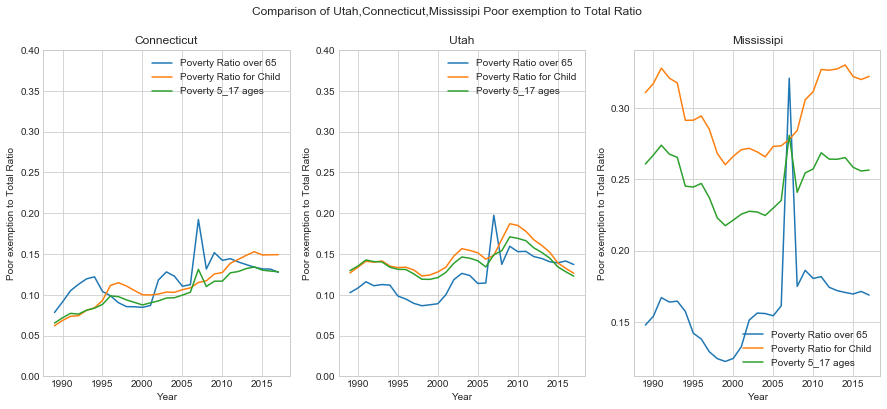

In [221]:
# Get data
df_irs_Utah=get_poor_to_total_ratio_data('Utah')
df_irs_Connecticut=get_poor_to_total_ratio_data('Connecticut')
df_irs_Mississippi=get_poor_to_total_ratio_data('Mississippi')

# Plot 
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,6))
fig.suptitle('Comparison of Utah,Connecticut,Mississipi Poor exemption to Total Ratio ')

ax1.plot(irs_year,df_irs_Connecticut['over_65_ratio'],label='Poverty Ratio over 65')
ax1.plot(irs_year,df_irs_Connecticut['child_ratio'],label='Poverty Ratio for Child')
ax1.plot(irs_year,df_irs_Connecticut['under_65_ratio'],label='Poverty 5_17 ages')
ax1.set_ylim(0, .4)
ax1.title.set_text('Connecticut')
ax1.set_xlabel('Year')
ax1.set_ylabel('Poor exemption to Total Ratio')
ax1.legend()

ax2.plot(irs_year,df_irs_Utah['over_65_ratio'],label='Poverty Ratio over 65')
ax2.plot(irs_year,df_irs_Utah['child_ratio'],label='Poverty Ratio for Child')
ax2.plot(irs_year,df_irs_Utah['under_65_ratio'],label='Poverty 5_17 ages')
ax2.set_ylim(0, .4)
ax2.title.set_text('Utah')
ax2.set_xlabel('Year')
ax2.set_ylabel('Poor exemption to Total Ratio')
ax2.legend()


ax3.plot(irs_year,df_irs_Mississippi['over_65_ratio'],label='Poverty Ratio over 65')
ax3.plot(irs_year,df_irs_Mississippi['child_ratio'],label='Poverty Ratio for Child')
ax3.plot(irs_year,df_irs_Mississippi['under_65_ratio'],label='Poverty 5_17 ages')
ax2.set_ylim(0, .4)
ax3.title.set_text('Mississipi')
ax3.set_xlabel('Year')
ax3.set_ylabel('Poor exemption to Total Ratio')
ax3.legend()
plt.show()

<br> 1) In general three states have different patterns except 2008 'Poverty Ratio over 65' spike
<br> 2) Before 2010, all ratios increased for Connecticut and Utah and after that it is decreasing for Utah and stable for Connecticut
<br> 3) Mississipi is showing complete different trend 
<br> 4) Local economy impacts more in all states

#### allpovu analysis

In [42]:
# Looking at data
#allpovu[allpovu['Name']=='Utah']

#### Data preperation 

In [228]:
def get_allpovu_by_state(state):
    """
    This function will flatten allpovu table filter for a state and return a table with all variables
    with poverty Universe for different years
    input : state
    output : table with all poverty universe variables
    """
    year_list=[i for i in range(1998,2018)]
    povuAllages_list=[allpovu[allpovu['Name']==state]['Poverty Universe, All Ages'].values[0]]
    povu_5_17_list=[allpovu[allpovu['Name']==state]['Poverty Universe, Age 5-17 related'].values[0]]
    povu_0_4_list=[allpovu[allpovu['Name']==state]['Poverty Universe, Age 0-4'].values[0]]
    
    for i in range(1,20):
        povuAllages_list.append(allpovu[allpovu['Name']==state]['Poverty Universe, All Ages.'+str(i)].values[0])
        povu_5_17_list.append(allpovu[allpovu['Name']==state]['Poverty Universe, Age 5-17 related.'+str(i)].values[0])
        povu_0_4_list.append(allpovu[allpovu['Name']==state]['Poverty Universe, Age 0-4.'+str(i)].values[0])
        
    df=pd.DataFrame(zip(year_list,povuAllages_list[::-1],povu_5_17_list[::-1],povu_0_4_list[::-1])\
                    ,columns=['Year','povu_all_ages','povu_5_17','povu_0_4']) 
    df['Ratio_0_4_to_all']=df['povu_0_4']/df['povu_all_ages']
    df['Ratio_5_17_to_all']=df['povu_5_17']/df['povu_all_ages']
    return(df)

In [231]:
get_allpovu_by_state(state).head()

,Year,povu_all_ages,povu_5_17,povu_0_4,Ratio_0_4_to_all,Ratio_5_17_to_all
0,1998,2202474.0,495656.0,207660.0,0.094285,0.225045
1,1999,2243729.0,492971.0,214244.0,0.095486,0.219711
2,2000,2280291.0,505126.0,222505.0,0.097577,0.221518
3,2001,2324130.0,504516.0,229963.0,0.098946,0.217077
4,2002,2355997.0,499034.0,230778.0,0.097953,0.211814


In [241]:
def get_year_over_year_change_allpovu(measure,state):
    """ 
    This function will calculate year over year change percentage 
    """
    df=get_allpovu_by_state(state)
    year_list=[i for i in range(1998,2018)]
    change_over_year_list=[]
    for i in range(1,len(df['Year'])):
        change_over_year=df[measure][df['Year']==year_list[i]].values[0]- \
                       df[measure][df['Year']==year_list[i-1]].values[0]
        change_over_year_prcnrg=round(100*(change_over_year/df[measure][df['Year']==year_list[i-1]]\
                                   .values[0]),4)
        change_over_year_list.append(change_over_year_prcnrg)

    return(change_over_year_list)

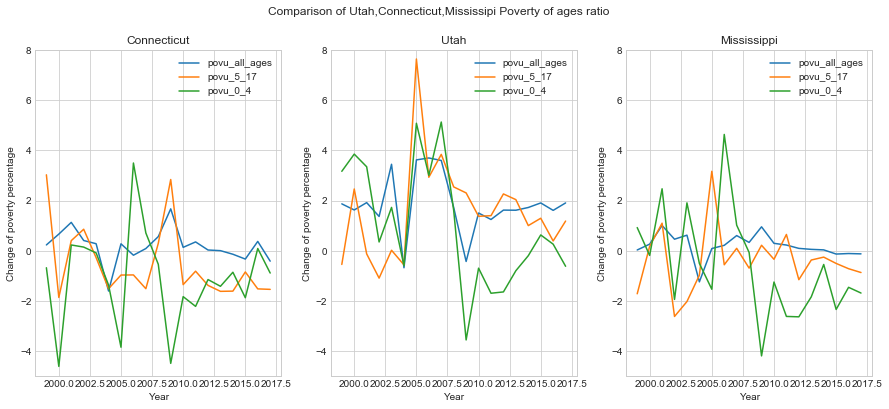

In [248]:
#pov_all_Utah=get_year_over_year_change_allpovu('povu_all_ages','Utah')

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,6))
fig.suptitle('Comparison of Utah,Connecticut,Mississipi Poverty of ages ratio ')

ax1.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_all_ages','Connecticut'),\
                                             label='povu_all_ages')
ax1.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_5_17','Connecticut'),\
                                             label='povu_5_17')
ax1.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_0_4','Connecticut'),\
                                             label='povu_0_4')
ax1.set_ylim(-5, 8)
ax1.title.set_text('Connecticut')
ax1.set_xlabel('Year')
ax1.set_ylabel('Change of poverty percentage')
ax1.legend()

ax2.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_all_ages','Utah'),\
                                             label='povu_all_ages')
ax2.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_5_17','Utah'),\
                                             label='povu_5_17')
ax2.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_0_4','Utah'),\
                                             label='povu_0_4')
ax2.set_ylim(-5, 8)
ax2.title.set_text('Utah')
ax2.set_xlabel('Year')
ax2.set_ylabel('Change of poverty percentage')
ax2.legend()

ax3.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_all_ages','Mississippi'),\
                                             label='povu_all_ages')
ax3.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_5_17','Mississippi'),\
                                             label='povu_5_17')
ax3.plot([i for i in range(1999,2018)],get_year_over_year_change_allpovu('povu_0_4','Mississippi'),\
                                             label='povu_0_4')
ax3.set_ylim(-5, 8)
ax3.title.set_text('Mississippi')
ax3.set_xlabel('Year')
ax3.set_ylabel('Change of poverty percentage')
ax3.legend()

<br> 1) In general poverty is not increasing after 2010
<br> 2) In general poverty for 0-4 age is decreasing which is good

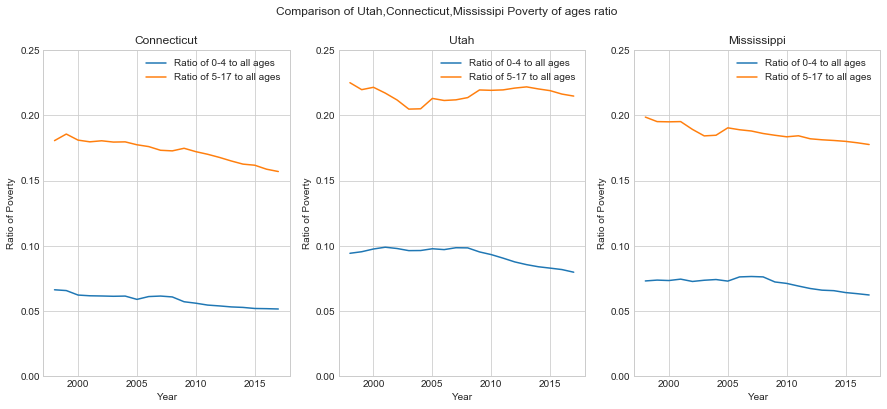

In [230]:
## get data 
df_allpovu_Connecticut=get_allpovu_by_state('Connecticut')
df_allpovu_Utah=get_allpovu_by_state('Utah')
df_allpovu_Mississippi=get_allpovu_by_state('Mississippi')

# Plot 
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,6))
fig.suptitle('Comparison of Utah,Connecticut,Mississipi Poverty of ages ratio ')

ax1.plot(df_allpovu_Connecticut['Year'],df_allpovu_Connecticut['Ratio_0_4_to_all'],label='Ratio of 0-4 to all ages')
ax1.plot(df_allpovu_Connecticut['Year'],df_allpovu_Connecticut['Ratio_5_17_to_all'],label='Ratio of 5-17 to all ages')
ax1.set_ylim(0, .25)
ax1.title.set_text('Connecticut')
ax1.set_xlabel('Year')
ax1.set_ylabel('Ratio of Poverty')
ax1.legend()

ax2.plot(df_allpovu_Utah['Year'],df_allpovu_Utah['Ratio_0_4_to_all'],label='Ratio of 0-4 to all ages')
ax2.plot(df_allpovu_Utah['Year'],df_allpovu_Utah['Ratio_5_17_to_all'],label='Ratio of 5-17 to all ages')
ax2.set_ylim(0, .25)
ax2.title.set_text('Utah')
ax2.set_xlabel('Year')
ax2.set_ylabel('Ratio of Poverty')
ax2.legend()

ax3.plot(df_allpovu_Mississippi['Year'],df_allpovu_Mississippi['Ratio_0_4_to_all'],label='Ratio of 0-4 to all ages')
ax3.plot(df_allpovu_Mississippi['Year'],df_allpovu_Mississippi['Ratio_5_17_to_all'],label='Ratio of 5-17 to all ages')
ax3.set_ylim(0, .25)
ax3.title.set_text('Mississippi')
ax3.set_xlabel('Year')
ax3.set_ylabel('Ratio of Poverty')
ax3.legend()
plt.show()


<br> In general for all states povert percentage for kids decreasing -that is good

#####  cntysnap

<br> Want to focus on number of people taken foodstamp in different counties of utah on 2017 july

In [4]:
# get data
utah_july_snap=cntysnap[(cntysnap['State FIPS code']==49)&(cntysnap['County FIPS code']!=0)]
utah_july_snap=utah_july_snap.drop(['State FIPS code','Name'],axis=1)
utah_july17_snap=utah_july_snap[['County FIPS code','July 2017']]

In [35]:
# Modifu FIPS data for plotting
fips =list(utah_july17_snap['County FIPS code'])
fips_modified=[]
for i in fips:
    if (i <10):
        fips_modified.append(int('4900'+str(i)))
    else:
        fips_modified.append(int('490'+str(i)))

In [40]:
# plot
values=list(utah_july17_snap['July 2017'])
fips =  fips_modified   #list(utah_july17_snap['County FIPS code'])
endpts = list(np.mgrid[min(values):max(values):8j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Utah'], show_state_data=True,
    colorscale=colorscale, 
    binning_endpoints=endpts, round_legend_values=True,
   plot_bgcolor='rgb(229,229,229)',
   paper_bgcolor='rgb(229,229,229)',
    legend_title='County SNAP 2017 July',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
   exponent_format=True,
)
fig.layout.template = None
fig.show()

<br> Expected result. Very high number of foodstamp in SLC area follwed by immediate north and south.
<br> Most of the other counties are very low 
<br> It suggests - population density proportionate to foodstamp numbers

#### External (census) data for the states

In [570]:
# data Processing
country_pop=county_population[['state_name','pop1981', 'pop1982','pop1983', 'pop1984', 'pop1985',
            'pop1986', 'pop1987', 'pop1988','pop1989', 'pop1990', 'pop1991', 'pop1992', 'pop1993',
             'pop1994','pop1995', 'pop1996', 'pop1997', 'pop1998', 'pop1999', 'pop2000','pop2001', 
            'pop2002', 'pop2003', 'pop2004', 'pop2005', 'pop2006','pop2007', 'pop2008', 'pop2009']]\
            [((county_population['state_name']=='Utah')&(county_population['areaname']=='Utah'))|\
                 ((county_population['state_name']=='Connecticut')&(county_population['areaname']=='Connecticut'))|\
                 (county_population['state_name']=='Mississippi')&(county_population['areaname']=='Mississippi')]
country_pop=country_pop.rename(columns={col:int(col[3:]) for col in list(country_pop.columns)\
                                        if col!='state_name'})
country_pop

,state_name,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
628,Connecticut,3128837.0,3139014.0,3162355.0,3180014.0,3201131.0,3223741.0,3247290.0,3271954.0,3283404.0,3289056.0,3288640.0,3274997.0,3272325.0,3268346.0,3265293.0,3267030.0,3268514.0,3272563.0,3282031.0,3411726.0,3428433.0,3448382.0,3467673.0,3474610.0,3477416.0,3485162.0,3488633.0,3502932.0,3518288.0
2833,Mississippi,2539032.0,2556776.0,2567719.0,2578053.0,2588103.0,2593596.0,2588545.0,2580349.0,2574272.0,2577426.0,2591230.0,2610193.0,2635574.0,2663450.0,2690788.0,2709925.0,2731826.0,2751335.0,2768619.0,2848310.0,2853313.0,2858643.0,2867678.0,2886006.0,2900116.0,2897150.0,2921723.0,2940212.0,2951996.0
5606,Utah,1515472.0,1558314.0,1594943.0,1622342.0,1642910.0,1662833.0,1678120.0,1689372.0,1705865.0,1729722.0,1771941.0,1821498.0,1875993.0,1930436.0,1976774.0,2022253.0,2065397.0,2100562.0,2129836.0,2244314.0,2291250.0,2334473.0,2379938.0,2438915.0,2499637.0,2583724.0,2663796.0,2727343.0,2784572.0


In [586]:
# data processing another table
df_pop_2018=pop_est_2018[['Unnamed: 0',2010,2011,2012,2013,2014,2015,2016,2017,2018]]\
            [(pop_est_2018['Unnamed: 0']=='.Connecticut')|(pop_est_2018['Unnamed: 0']=='.Mississippi')|\
              (pop_est_2018['Unnamed: 0']=='.Utah')]
df_pop_2018=df_pop_2018.rename(columns={'Unnamed: 0':'state_name'})
df_pop_2018['state_name']=df_pop_2018['state_name'].apply(lambda x: x[1:])
df_pop_2018

,state_name,2010,2011,2012,2013,2014,2015,2016,2017,2018
11,Connecticut,3579114.0,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0
29,Mississippi,2970548.0,2978731.0,2983816.0,2988711.0,2990468.0,2988471.0,2987938.0,2988510.0,2981020.0
49,Utah,2775332.0,2814384.0,2853375.0,2897640.0,2936879.0,2981835.0,3041868.0,3101042.0,3153550.0


In [603]:
# merging data
df_pop=pd.merge(country_pop,df_pop_2018,on='state_name')
df_pop['state_name']=df_pop['state_name'].apply(lambda x: 'pop_'+str(x))
df_pop=df_pop.set_index(['state_name'])
df_pop=df_pop.T.reset_index()
df_pop=df_pop.rename(columns={'index':'Year'})

#### Statesnap data

In [604]:
# get data
df_state_snap=statesnap[['Year','Num. Month','Utah','Connecticut','Mississippi']][statesnap['Year']>1981.0]\
                        .sort_values(by=['Year','Num. Month'])
df_state_snap['Year']=df_state_snap['Year'].astype(int)
df_state_snap=df_state_snap.groupby('Year').agg({'Utah':'mean','Connecticut':'mean','Mississippi':'mean'}).reset_index()

In [607]:
df_state_snap=pd.merge(df_pop,df_state_snap,on=['Year'])

#### Ratio for snap to pop

In [610]:
df_state_snap['Utah_snap_pop_ratio']=df_state_snap['Utah']/df_state_snap['pop_Utah']
df_state_snap['Conecticut_snap_pop_ratio']=df_state_snap['Connecticut']/df_state_snap['pop_Connecticut']
df_state_snap['Mississippi_snap_pop_ratio']=df_state_snap['Mississippi']/df_state_snap['pop_Mississippi']
df_state_snap.columns

Index(['Year', 'pop_Connecticut', 'pop_Mississippi', 'pop_Utah', 'Utah',
       'Connecticut', 'Mississippi', 'Utah_snap_pop_ratio',
       'Conecticut_snap_pop_ratio', 'Mississippi_snap_pop_ratio'],
      dtype='object')

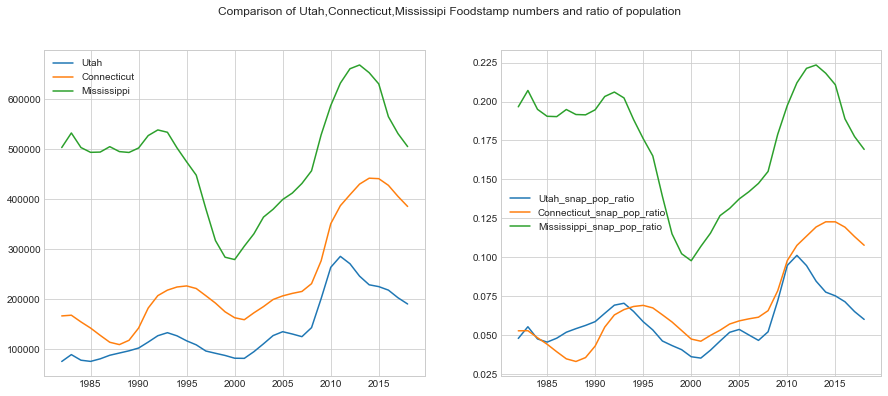

In [612]:
# Plot 
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,6))
fig.suptitle('Comparison of Utah,Connecticut,Mississipi Foodstamp numbers and ratio of population')

ax1.plot(df_state_snap['Year'],df_state_snap['Utah'],label='Utah')
ax1.plot(df_state_snap['Year'],df_state_snap['Connecticut'],label='Connecticut')
ax1.plot(df_state_snap['Year'],df_state_snap['Mississippi'],label='Mississippi')
ax1.legend()

ax2.plot(df_state_snap['Year'],df_state_snap['Utah_snap_pop_ratio'],label='Utah_snap_pop_ratio')
ax2.plot(df_state_snap['Year'],df_state_snap['Conecticut_snap_pop_ratio'],label='Connecticut_snap_pop_ratio')
ax2.plot(df_state_snap['Year'],df_state_snap['Mississippi_snap_pop_ratio'],label='Mississippi_snap_pop_ratio')

ax2.legend()

plt.show()

<br> 1) Overall decrease in foodstamp number after 2012 .
<br> 2) Utah and connecticut have similar patern but mississippi has different

#### Data preperation for modeling 
##### Aggregating irs data and allpovu data

In [371]:
df_agg_irs=irs[(irs['Year']>=1998)]
measure_list=['Total exemptions','Poor exemptions','Median AGI', 'Mean AGI'] 
# 'Age 65 and over exemptions','Age 65 and over poor exemptions',\
 #'Child exemptions','Poor child exemptions', 'Total exemptions under age 65',\
#'Poor exemptions under age 65', 
df_agg_irs=df_agg_irs.groupby('Name').agg({k:['mean','std'] for k in measure_list})
df_agg_irs.columns=[str(col[0])+'_'+str(col[1]) for col in df_agg_irs]
df_agg_irs=df_agg_irs.reset_index()

In [384]:
df_agg_irs.shape

(51, 9)

In [352]:
dict_agg_allpovu={}
for state in irs_state:
    df=get_allpovu_by_state(state)
    dict_agg_allpovu[state]=[df['povu_all_ages'].mean(),df.loc[:,'povu_all_ages'].std(),df['povu_5_17'].mean(),\
                      df.loc[:,'povu_5_17'].std(),df['povu_0_4'].mean(),df.loc[:,'povu_0_4'].std()]
df_agg_allpovu=pd.DataFrame(dict_agg_allpovu).T.reset_index()
df_agg_allpovu.columns=['Name','povu_all_ages_mean','povu_all_ages_std','povu_5_17_mean',
                       'povu_5_17_std','povu_0_4_std','povu_0_4_std']
df_agg_allpovu.columns=[str(col[0])+'_'+str(col[1]) for col in df_agg_allpovu]
df_agg_allpovu=df_agg_allpovu.reset_index()

In [385]:
df_agg=pd.merge(df_agg_irs,df_agg_irs,on=['Name'])
df_agg=df_agg.set_index(['Name'])
df_agg_array=np.array(df_agg)
df_agg_array.shape

(51, 16)

In [386]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_agg_array_scaled = min_max_scaler.fit_transform(df_agg_array)

##### K-mean clustering - cluster states with similar patterns

In [374]:
from sklearn.cluster import KMeans

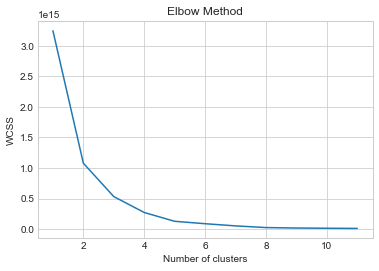

In [387]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1200, n_init=10, random_state=0)
    kmeans.fit(df_agg_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

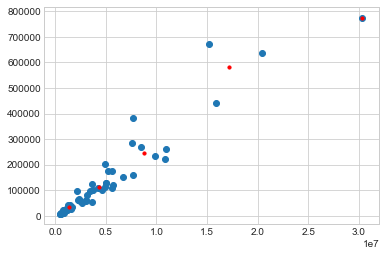

In [393]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_agg_array)
plt.scatter(df_agg_array[:,0], df_agg_array[:,3])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], s=10, c='red')
plt.show()

<br> Clusters are not well seperated. Not very useful information we can get from here but there are some outliers

#### Regression model 
##### To find relation with number of foodstamp with other feature variables

In [401]:
df_statesnap=statesnap[statesnap['Year']>=1998]
df_statesnap=df_statesnap.drop(['Month', 'Num. Month'],axis=1)

In [403]:
df_agg=df_statesnap.groupby('Year').mean().reset_index()

##### Target variable

In [474]:
target=[]
for yr in list(df_agg['Year'].astype(int).unique()):
    for state in list(set(df_agg.columns)-{'Year'}):
        target.append({"State":state,"Year":yr,"Target":round(df_agg[state][df_agg['Year']==yr].values[0],0)})

target=pd.DataFrame(target)
target['Year']=target['Year'].astype(int)
#target=target.set_index(['State','Year'])
#target

In [479]:
target.shape

(1071, 3)

#### Prepare feature variables

In [459]:
df_agg_irs=irs[(irs['Year']>=1998)]
measure_list=['Total exemptions','Poor exemptions','Median AGI', 'Mean AGI', 'Age 65 and over exemptions',\
              'Age 65 and over poor exemptions','Child exemptions','Poor child exemptions',\
              'Total exemptions under age 65','Poor exemptions under age 65']
df_agg_irs=df_agg_irs.groupby(['Name','Year']).agg({k:['mean'] for k in measure_list})
df_agg_irs.columns=[str(col[0])+'_'+str(col[1]) for col in df_agg_irs]
df_agg_irs=df_agg_irs.reset_index()
df_agg_irs=df_agg_irs.rename(columns={'Name':'State'})

In [460]:
df_agg_allpovu=[]
for state in irs_state:
    df=get_allpovu_by_state(state)
    for yr in list(df['Year'].unique()):
        df_agg_allpovu.append({"State":state,"Year":yr,"all_ages":df['povu_all_ages'][df['Year']==yr].values[0],
                    "5-17":df['povu_5_17'][df['Year']==yr].values[0],"0_4":df['povu_0_4'][df['Year']==yr].values[0]})
df_agg_allpovu=pd.DataFrame(df_agg_allpovu)

In [484]:
df_final=pd.merge(df_agg_allpovu,df_agg_irs,on=['State','Year'])
df_final=pd.merge(df_final,target,on=['State','Year'])
df_final.head()

,State,Year,all_ages,5-17,0_4,Total exemptions_mean,Poor exemptions_mean,Median AGI_mean,Mean AGI_mean,Age 65 and over exemptions_mean,Age 65 and over poor exemptions_mean,Child exemptions_mean,Poor child exemptions_mean,Total exemptions under age 65_mean,Poor exemptions under age 65_mean,Target
0,Florida,1998,15690191.0,2577387.0,942071.0,12400211,2100290,24684,42456,1529947,147165,3589248,801283,10870264,1953125,964450.0
1,Florida,1999,16002039.0,2656195.0,994725.0,13016199,2144439,25852,47530,1585790,157091,3775846,804422,11430409,1987348,920645.0
2,Florida,2000,16306747.0,2730693.0,1011506.0,13346772,2184709,27032,50605,1603783,158912,3879690,816691,11742989,2025797,876052.0
3,Florida,2001,16684871.0,2799200.0,1045990.0,13658964,2324292,27111,48192,1646293,195736,3968316,846756,12012671,2128556,909955.0
4,Florida,2002,17028820.0,2842050.0,1069849.0,13908972,2456427,27028,47560,1657158,235664,4070027,881126,12251814,2220763,1009809.0


In [485]:
df_final.shape

(1020, 16)

In [486]:
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split
df_final=df_final.set_index(['State','Year'])
indices=df_final.index.values
labels = np.array(df_final['Target'])
features= df_final.drop(['Target'], axis = 1)
features = np.array(features)
min_max_scaler = preprocessing.MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)
train_features, eval_features, train_labels, eval_labels,idx_train,idx_eval = \
            train_test_split(features_scaled, labels,indices, test_size = 0.2, random_state = 7)

#### Decision tree regression

In [513]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn import tree
regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
regressor.fit(train_features,train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [514]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [515]:
eval_pred = regressor.predict(eval_features)
print('r squared error  :'+str(metrics.r2_score(eval_labels,eval_pred)))
print('mean absolute percentage error :'+str(mean_absolute_percentage_error(eval_labels,eval_pred)))

r squared error  :0.9431421590022836
mean absolute percentage error :20.117916553484356


In [519]:
regressor.feature_importances_

array([0.04325677, 0.00162446, 0.01589624, 0.01378029, 0.74711845,
       0.00457945, 0.00796651, 0.00322749, 0.12899392, 0.00145034,
       0.02288654, 0.00083801, 0.00838154])

In [518]:
df_top_feature_importance=pd.DataFrame(zip(df_final.columns,regressor.feature_importances_),\
                                       columns=['features','importance'])
df_top_feature_importance.sort_values(by='importance',ascending=False).head(5)

,features,importance
4,Poor exemptions_mean,0.747118
8,Age 65 and over poor exemptions_mean,0.128994
0,all_ages,0.043257
10,Poor child exemptions_mean,0.022887
2,0_4,0.015896


<br> 1) With very simple modeling and without any hyperparameter tuning we can see good relation 
between number of foodstamp users and other economic variables. 
<br> 2) 'Poor Exemption' is very strongly related to target variable.
<br> 3) This model can be improved more to predict number of foodstamp users for each state each year or month
<br> 4) For future prediction,feature variable data can be estimated by timeseries analysis

#### Conclusion 
<br> Here the analysis is done in very high level 
<br> This dataset is really reach and lot of good economic analysis can be done using this data.
<br> This analysis can be very helpful to understad relation between economy, poverty and how society changing
<br> Many special analyis -for example 2010-12 financial crisis and impact can be analysed
